In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('wine (2).csv')
df.drop('Unnamed: 0', axis =1 ,inplace = True)

In [3]:
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality,type
0,10.55,0.050,0.06,0.99236,6.0,38.0,3.30,1.8,0.50,89.0,0.54,6,red
1,11.60,0.086,0.31,1.00020,8.7,23.0,3.48,3.0,0.74,81.0,0.69,6,red
2,11.70,0.012,0.28,0.99064,6.7,36.0,3.26,2.4,0.39,100.0,0.28,7,red
3,9.50,0.078,0.24,0.99830,7.5,10.0,3.45,2.0,0.78,28.0,0.55,6,red
4,9.20,0.088,0.26,0.99810,7.8,23.0,3.41,2.0,0.74,48.0,0.54,6,red


In [4]:
df.corr()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
features/alcohol,1.000000,-0.256916,-0.010493,-0.686745,-0.095452,-0.179838,0.121248,-0.359415,-0.003029,-0.265740,-0.037640,0.444319
features/chlorides,-0.256916,1.000000,0.038998,0.362615,0.298195,-0.195045,0.044708,-0.128940,0.395593,-0.279630,0.377124,-0.200666
features/citric acid,-0.010493,0.038998,1.000000,0.096154,0.324436,0.133126,-0.329808,0.142451,0.056197,0.195242,-0.377981,0.085532
features/density,-0.686745,0.362615,0.096154,1.000000,0.458910,0.025717,0.011686,0.552517,0.259478,0.032395,0.271296,-0.305858
features/fixed acidity,-0.095452,0.298195,0.324436,0.458910,1.000000,-0.282735,-0.252700,-0.111981,0.299568,-0.329054,0.219008,-0.076743
features/free sulfur dioxide,-0.179838,-0.195045,0.133126,0.025717,-0.282735,1.000000,-0.145854,0.402871,-0.188457,0.720934,-0.352557,0.055463
features/pH,0.121248,0.044708,-0.329808,0.011686,-0.252700,-0.145854,1.000000,-0.267320,0.192123,-0.238413,0.261454,0.019506
features/residual sugar,-0.359415,-0.128940,0.142451,0.552517,-0.111981,0.402871,-0.267320,1.000000,-0.185927,0.495482,-0.196011,-0.036980
features/sulphates,-0.003029,0.395593,0.056197,0.259478,0.299568,-0.188457,0.192123,-0.185927,1.000000,-0.275727,0.225984,0.038485
features/total sulfur dioxide,-0.265740,-0.279630,0.195242,0.032395,-0.329054,0.720934,-0.238413,0.495482,-0.275727,1.000000,-0.414476,-0.041385


In [5]:
df.info()
df.quality.astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   features/alcohol               6497 non-null   float64
 1   features/chlorides             6497 non-null   float64
 2   features/citric acid           6497 non-null   float64
 3   features/density               6497 non-null   float64
 4   features/fixed acidity         6497 non-null   float64
 5   features/free sulfur dioxide   6497 non-null   float64
 6   features/pH                    6497 non-null   float64
 7   features/residual sugar        6497 non-null   float64
 8   features/sulphates             6497 non-null   float64
 9   features/total sulfur dioxide  6497 non-null   float64
 10  features/volatile acidity      6497 non-null   float64
 11  quality                        6497 non-null   int64  
 12  type                           6497 non-null   o

0       6.0
1       6.0
2       7.0
3       6.0
4       6.0
       ... 
6492    7.0
6493    6.0
6494    5.0
6495    6.0
6496    7.0
Name: quality, Length: 6497, dtype: float64

Построим матрицу корреляций и попробуем проанализировать, какие зависимости между характеристиками вина есть в нашей выборке данных.


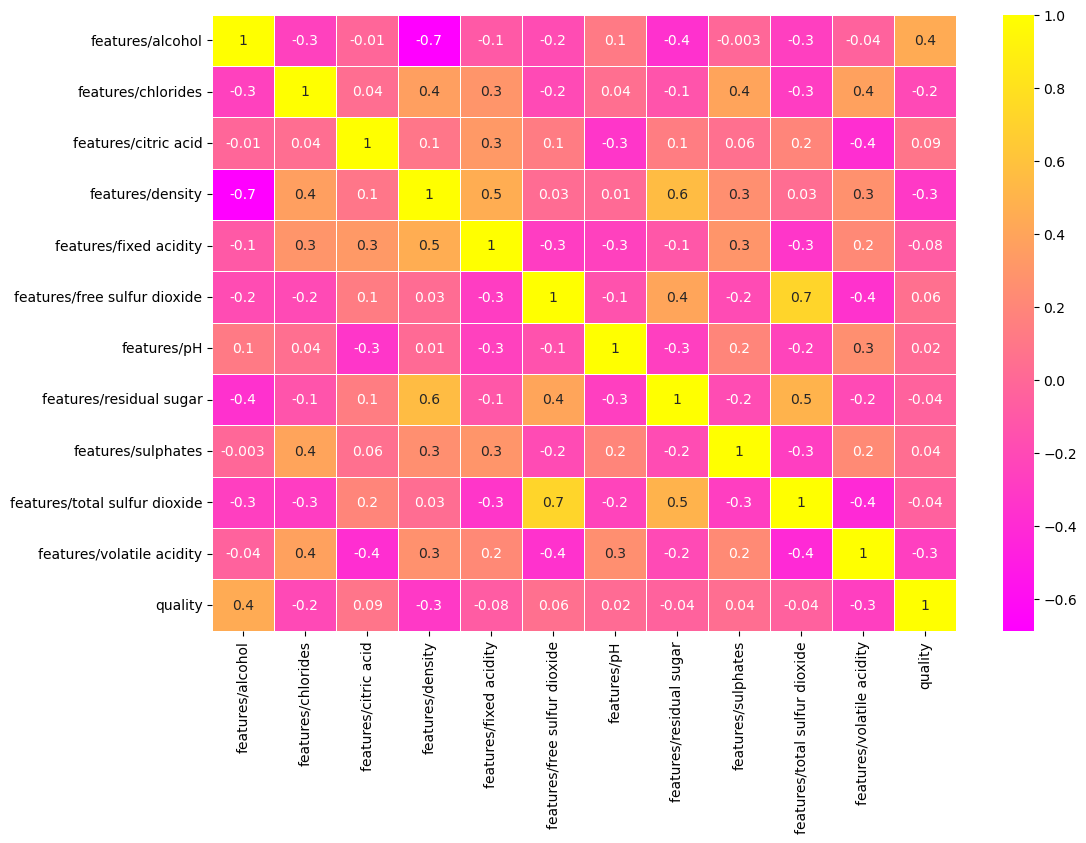

In [6]:

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),  annot=True, fmt='.1g', cmap = 'spring', linewidths=.5, ax=ax);

Взглянув на тепловую матрицу корреляций, можно заметить, что есть прямые отрицательные зависимости между плотностью вина и содержанием алкоголя в нем (-0,7), также есть прямая слабая отрицательная зависимость между содержанием сахара и алкоголя (-0,4) и прямая слабая отрицательная зависимость между диоксидом серы, лимонной кислотой и летучей кислотностью (-0,4).

Из положительных линейных корреляционнах зависимостей по мере убывания стоит отметить: дикосид серы и свободный дикосид серы (0.7), остаточный сахар и плотность (0,6), дикосид серы и остаточный сахар (0,5), плотность и кислотность (0,5). Все остальные зависимости являются линейно слабыми, и брать их в оценку не совсем рационально.

# Анализ данных по красному вину


In [7]:
r = (df[df['type'] == 'red'])
w = (df[df['type'] == 'white'])
r

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality,type
0,10.55,0.050,0.06,0.99236,6.0,38.0,3.30,1.8,0.50,89.0,0.540,6,red
1,11.60,0.086,0.31,1.00020,8.7,23.0,3.48,3.0,0.74,81.0,0.690,6,red
2,11.70,0.012,0.28,0.99064,6.7,36.0,3.26,2.4,0.39,100.0,0.280,7,red
3,9.50,0.078,0.24,0.99830,7.5,10.0,3.45,2.0,0.78,28.0,0.550,6,red
4,9.20,0.088,0.26,0.99810,7.8,23.0,3.41,2.0,0.74,48.0,0.540,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.50,0.069,0.32,0.99632,7.3,35.0,3.33,2.2,0.51,104.0,0.690,5,red
1595,11.50,0.096,0.00,0.99557,6.5,3.0,3.62,2.2,0.62,13.0,0.580,4,red
1596,9.80,0.076,0.13,0.99730,6.7,15.0,3.61,2.0,0.64,36.0,0.540,5,red
1597,10.30,0.086,0.03,0.99690,7.6,14.0,3.37,1.9,0.46,57.0,0.645,5,red


Попробуем проналаизировать матрицы корреляций для разного вида вина и тоже найти некоторые интересные зависимости.

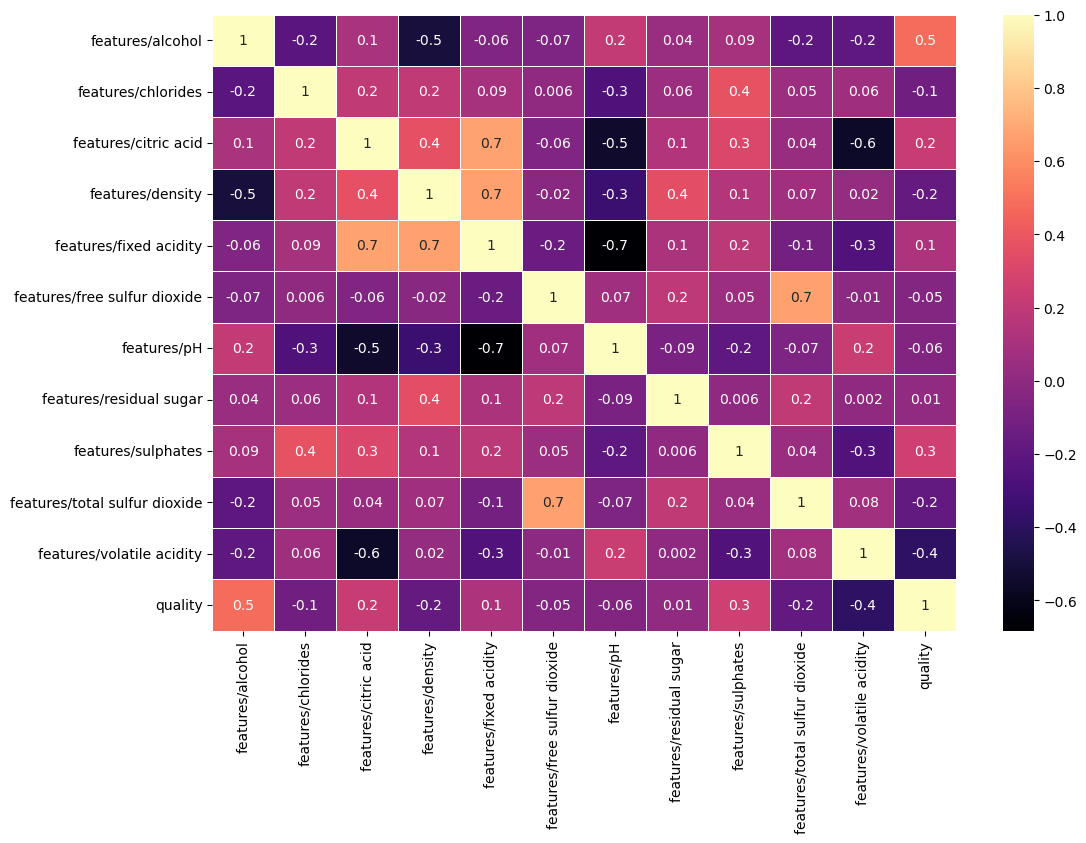

In [8]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(r.corr(),  annot=True, fmt='.1g', cmap = 'magma', linewidths=.5, ax=ax);

В ходе построения матрицы корреляций стало ясно, что существует яркая прямая зависимость плотности и кислостности красного вина также можно предположить, что чем более кислотное вино, тем больше в нем содержится лимонной кислоты. Относительно взаимосвязей между качеством и наличием особых химических компонентов в вине прямых сильных линейных связей нет, помимо яркой положительной зависимости о том, что вино с большим содержанием алкоголя получило более высокие оценки качества.

F:\Program Files (x86)\ANACONDA\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


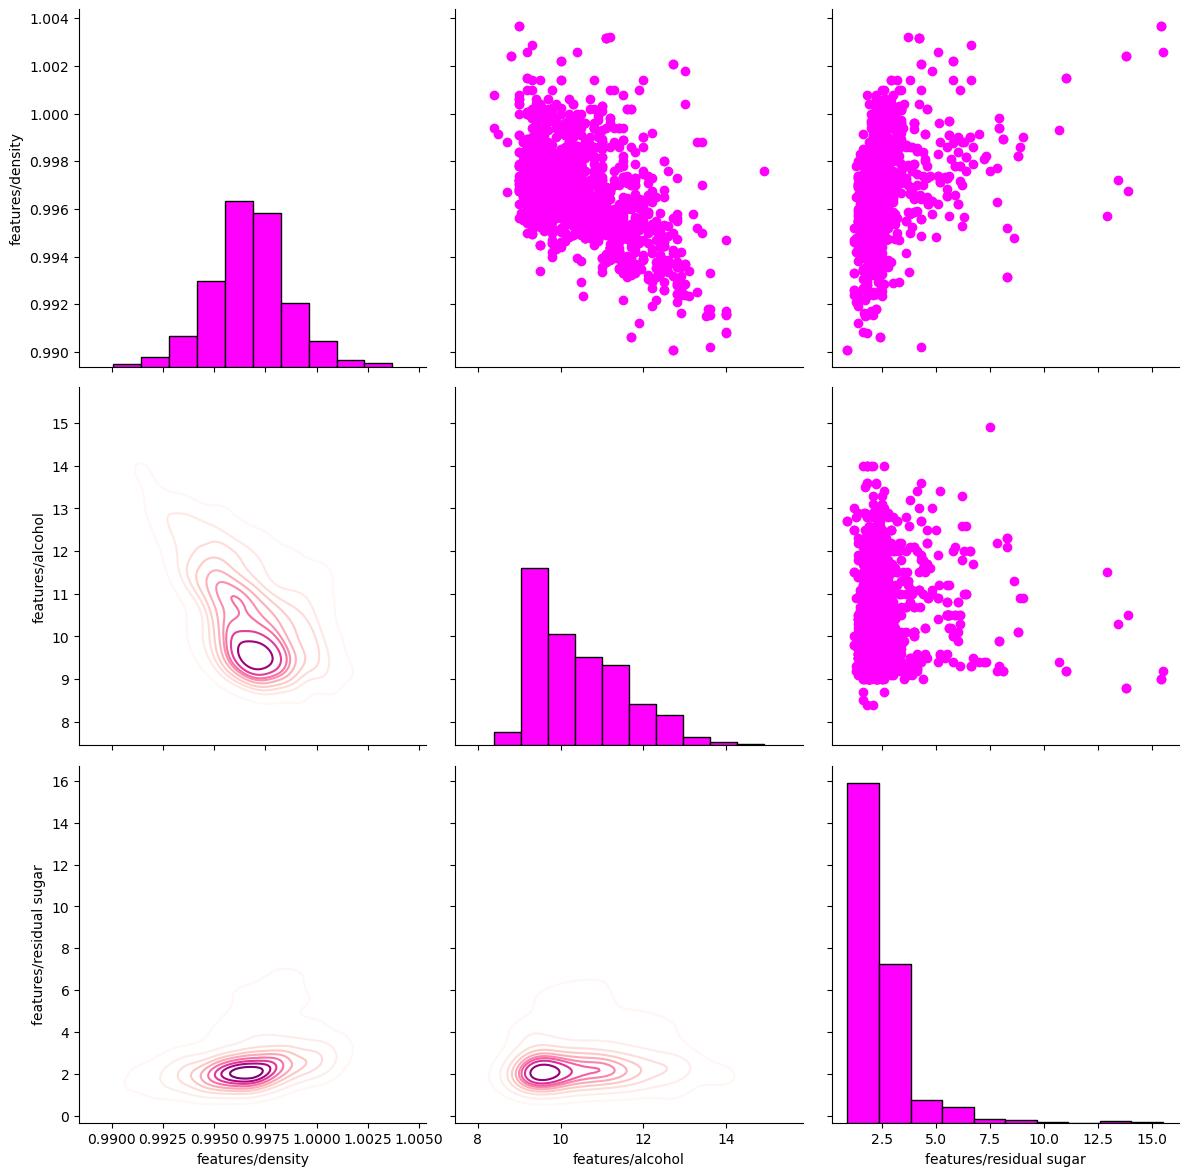

In [9]:
def corr(x, y,  **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))    
grid = sns.PairGrid(data= df[df['type'] == 'red'],
                    vars = ['features/density', 'features/alcohol', 'features/residual sugar'], size = 4)
grid = grid.map_upper(plt.scatter, color = 'magenta')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'RdPu')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'magenta');


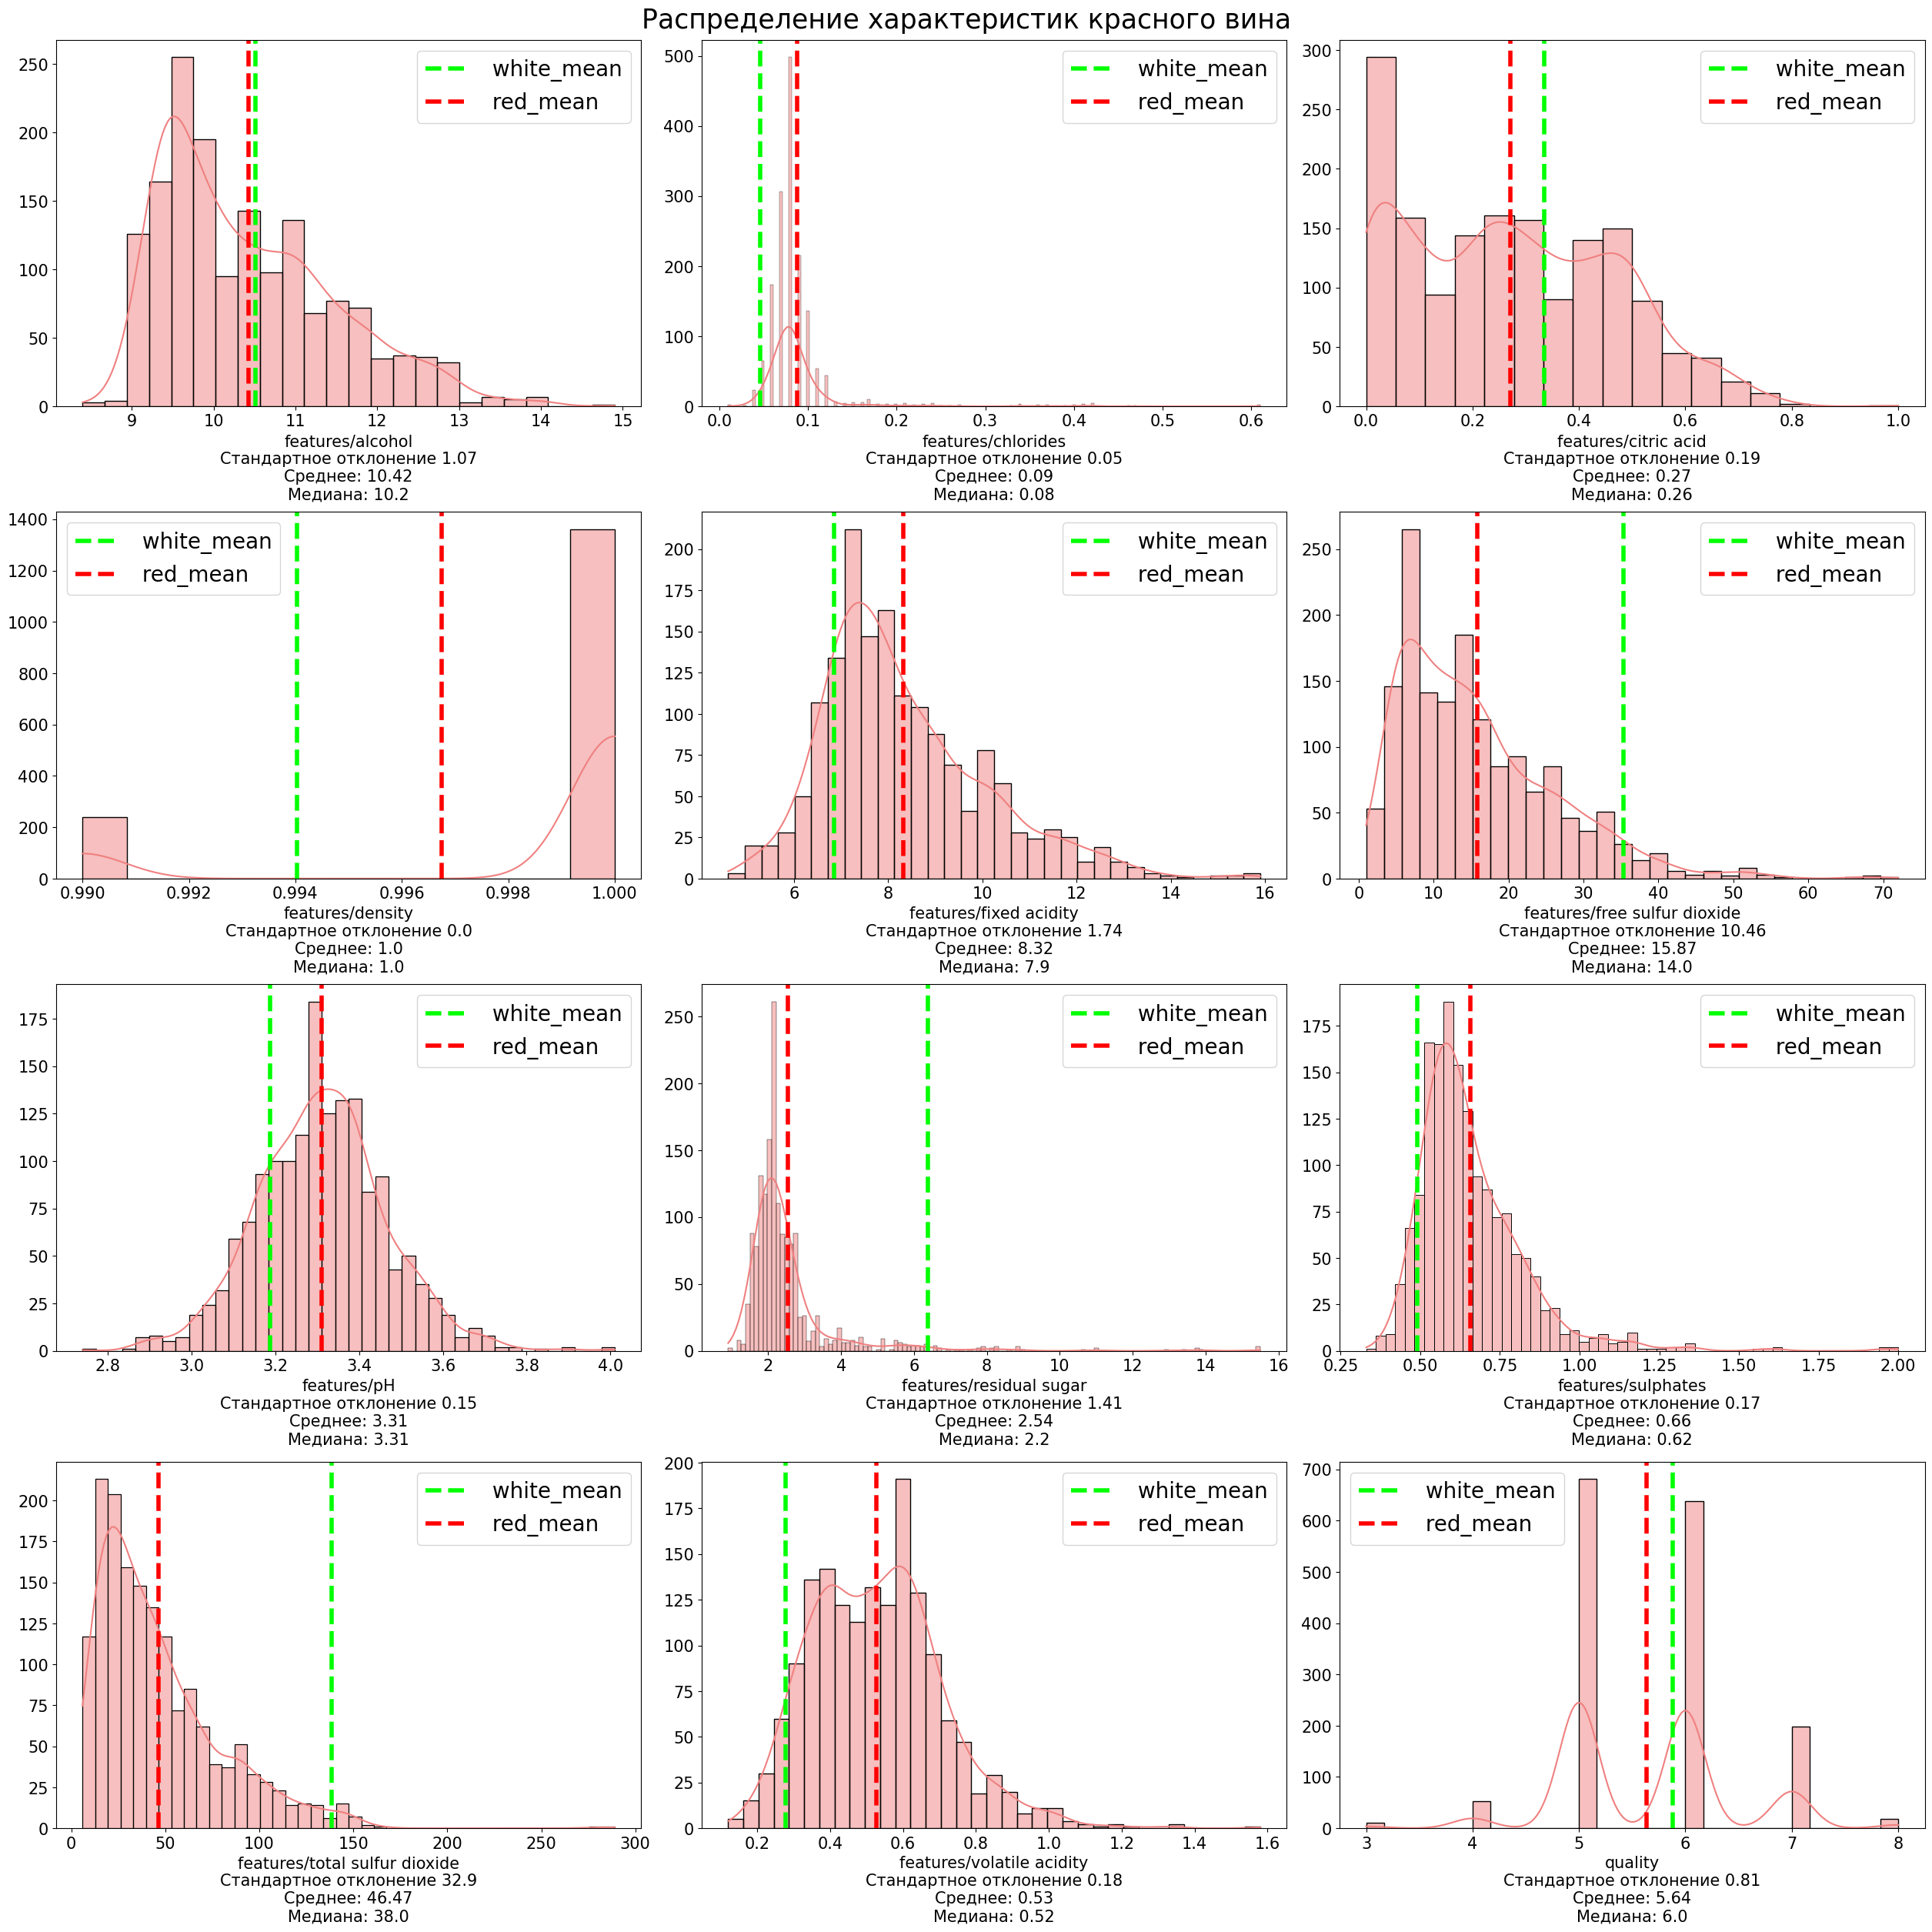

In [10]:
fig, ax = plt.subplots(4,3, constrained_layout=True)
fig.set_size_inches(25,25)
ax_list =[]
for n in range(4):
    for m in range(3):
        ax_list.append(ax[n,m])
        

for i in range(len(list(r.columns[:-1]))):
    col = r.columns[i]
    sns.histplot(round(r[col],2), ax = ax_list[i], kde =True, color= 'lightcoral')
    ax_list[i].set_xlabel(col + '\nСтандартное отклонение ' + str(round(r[col].std(),2)) + '\nСреднее: ' + str(round(r[col].mean(),2)) +
                          '\nМедиана: ' + str(round(r[col].median(),2)), size =15)
    
    ax_list[i].set_ylabel('')
    ax_list[i].tick_params(axis ='y', labelsize =15)
    ax_list[i].tick_params(axis ='x', labelsize = 15)
    ax_list[i].axvline(w[col].mean(), c= 'lime', ls ='--', lw=4, label= ' white_mean')
    ax_list[i].axvline(r[col].mean(), c= 'red', ls ='--', lw=4, label= ' red_mean')
    ax_list[i].legend(fontsize = 20)
    
fig.suptitle('Распределение характеристик красного вина', size =25)
    
plt.show()

# Анализ данных по белому вину

Дальше мы решили проанализировать выборку из наших данных по белому вину и посмотреть какие зависимости ярко различимыи какие дальнейшие выводы можно сделать из нее, для того чтобы поставить гипотезу и провести более детальный анализ.

In [11]:

w

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality,type
1599,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5,white
1600,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6,white
1601,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4,white
1602,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6,white
1603,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,11.3,0.051,0.44,0.99058,6.4,39.0,3.11,1.20,0.75,122.0,0.16,7,white
6493,10.8,0.050,0.27,0.99476,6.1,51.0,3.22,11.50,0.37,133.0,0.24,6,white
6494,8.7,0.051,0.59,0.99886,8.1,60.0,2.96,13.60,0.39,134.0,0.36,5,white
6495,10.6,0.031,0.28,1.00295,6.8,27.0,3.06,26.05,0.42,122.0,0.45,6,white


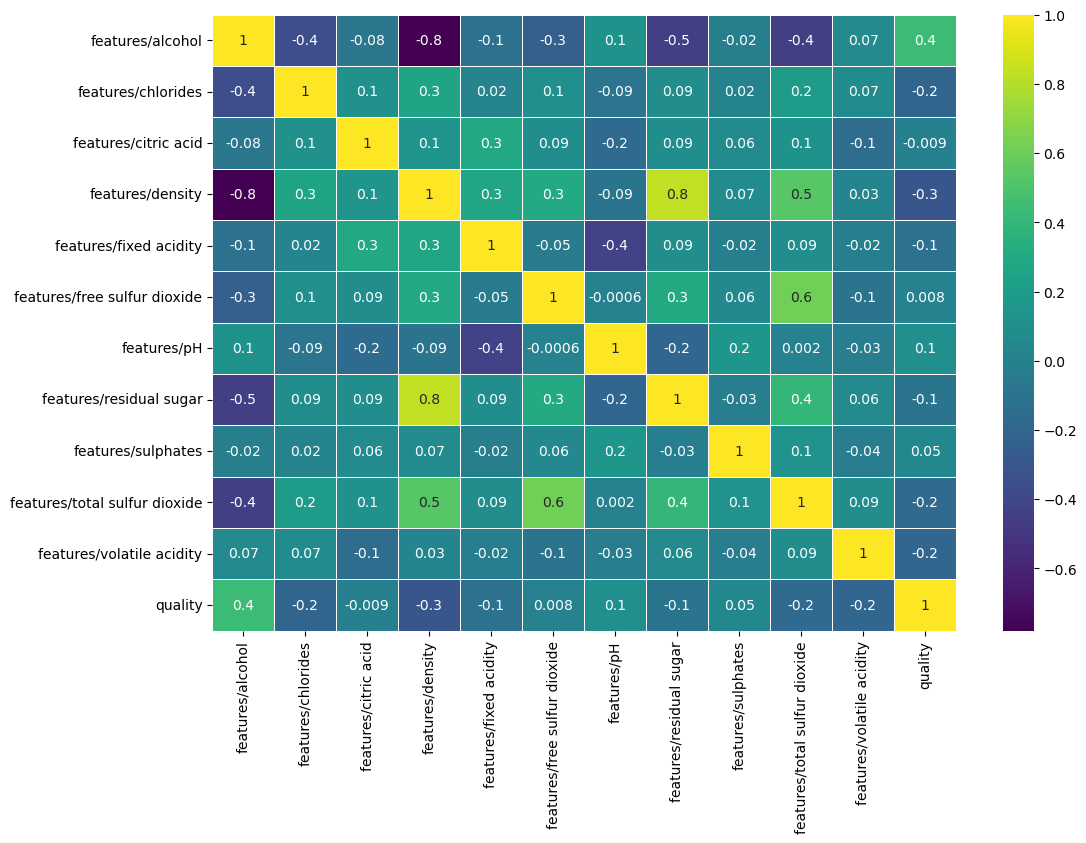

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(w.corr(),  annot=True, fmt='.1g', cmap = 'viridis', linewidths=.5, ax=ax);

Анализируя имеющуюся матрицу, стало понятно, что отличительным признаком белого вина в отличие от красного стало отсутствие прямой зависимости между кислотностью и плотностью и кислотностью и наличием лимонной кислоты. Также замечена более высокая положительная связь между наличием остаточного сахара и плотностью - следовательно чем плотнее вино, тем оно слаще - однако данное правило для красного вина не работает. 

F:\Program Files (x86)\ANACONDA\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


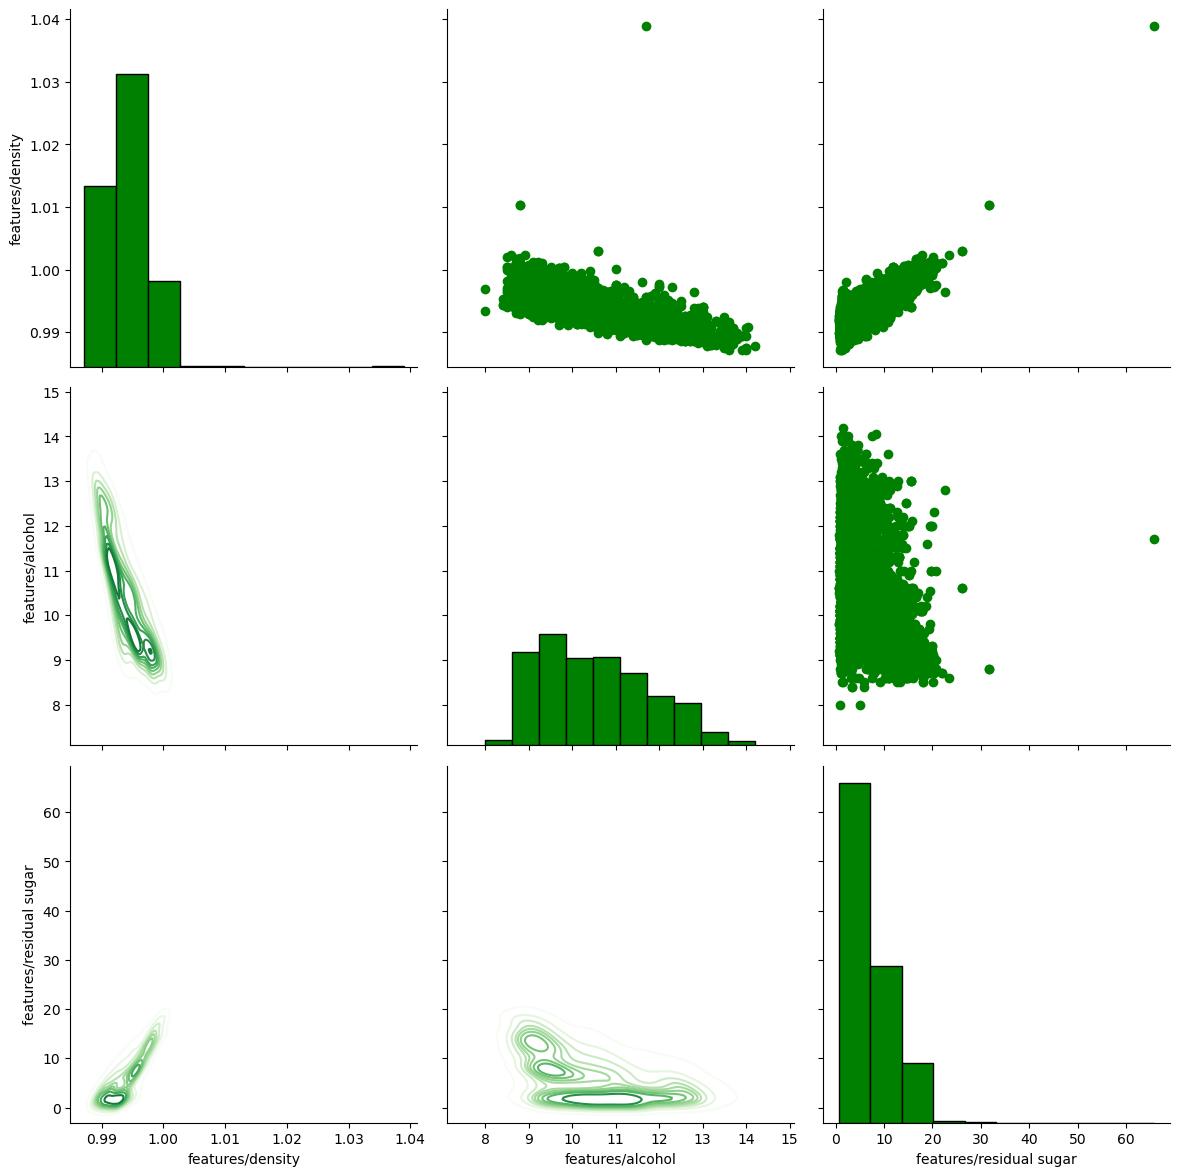

In [13]:
def corr(x, y,  **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))    
grid = sns.PairGrid(data= df[df['type'] == 'white'],
                    vars = ['features/density', 'features/alcohol', 'features/residual sugar'], size = 4)
grid = grid.map_upper(plt.scatter, color = 'green')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Greens')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'green');


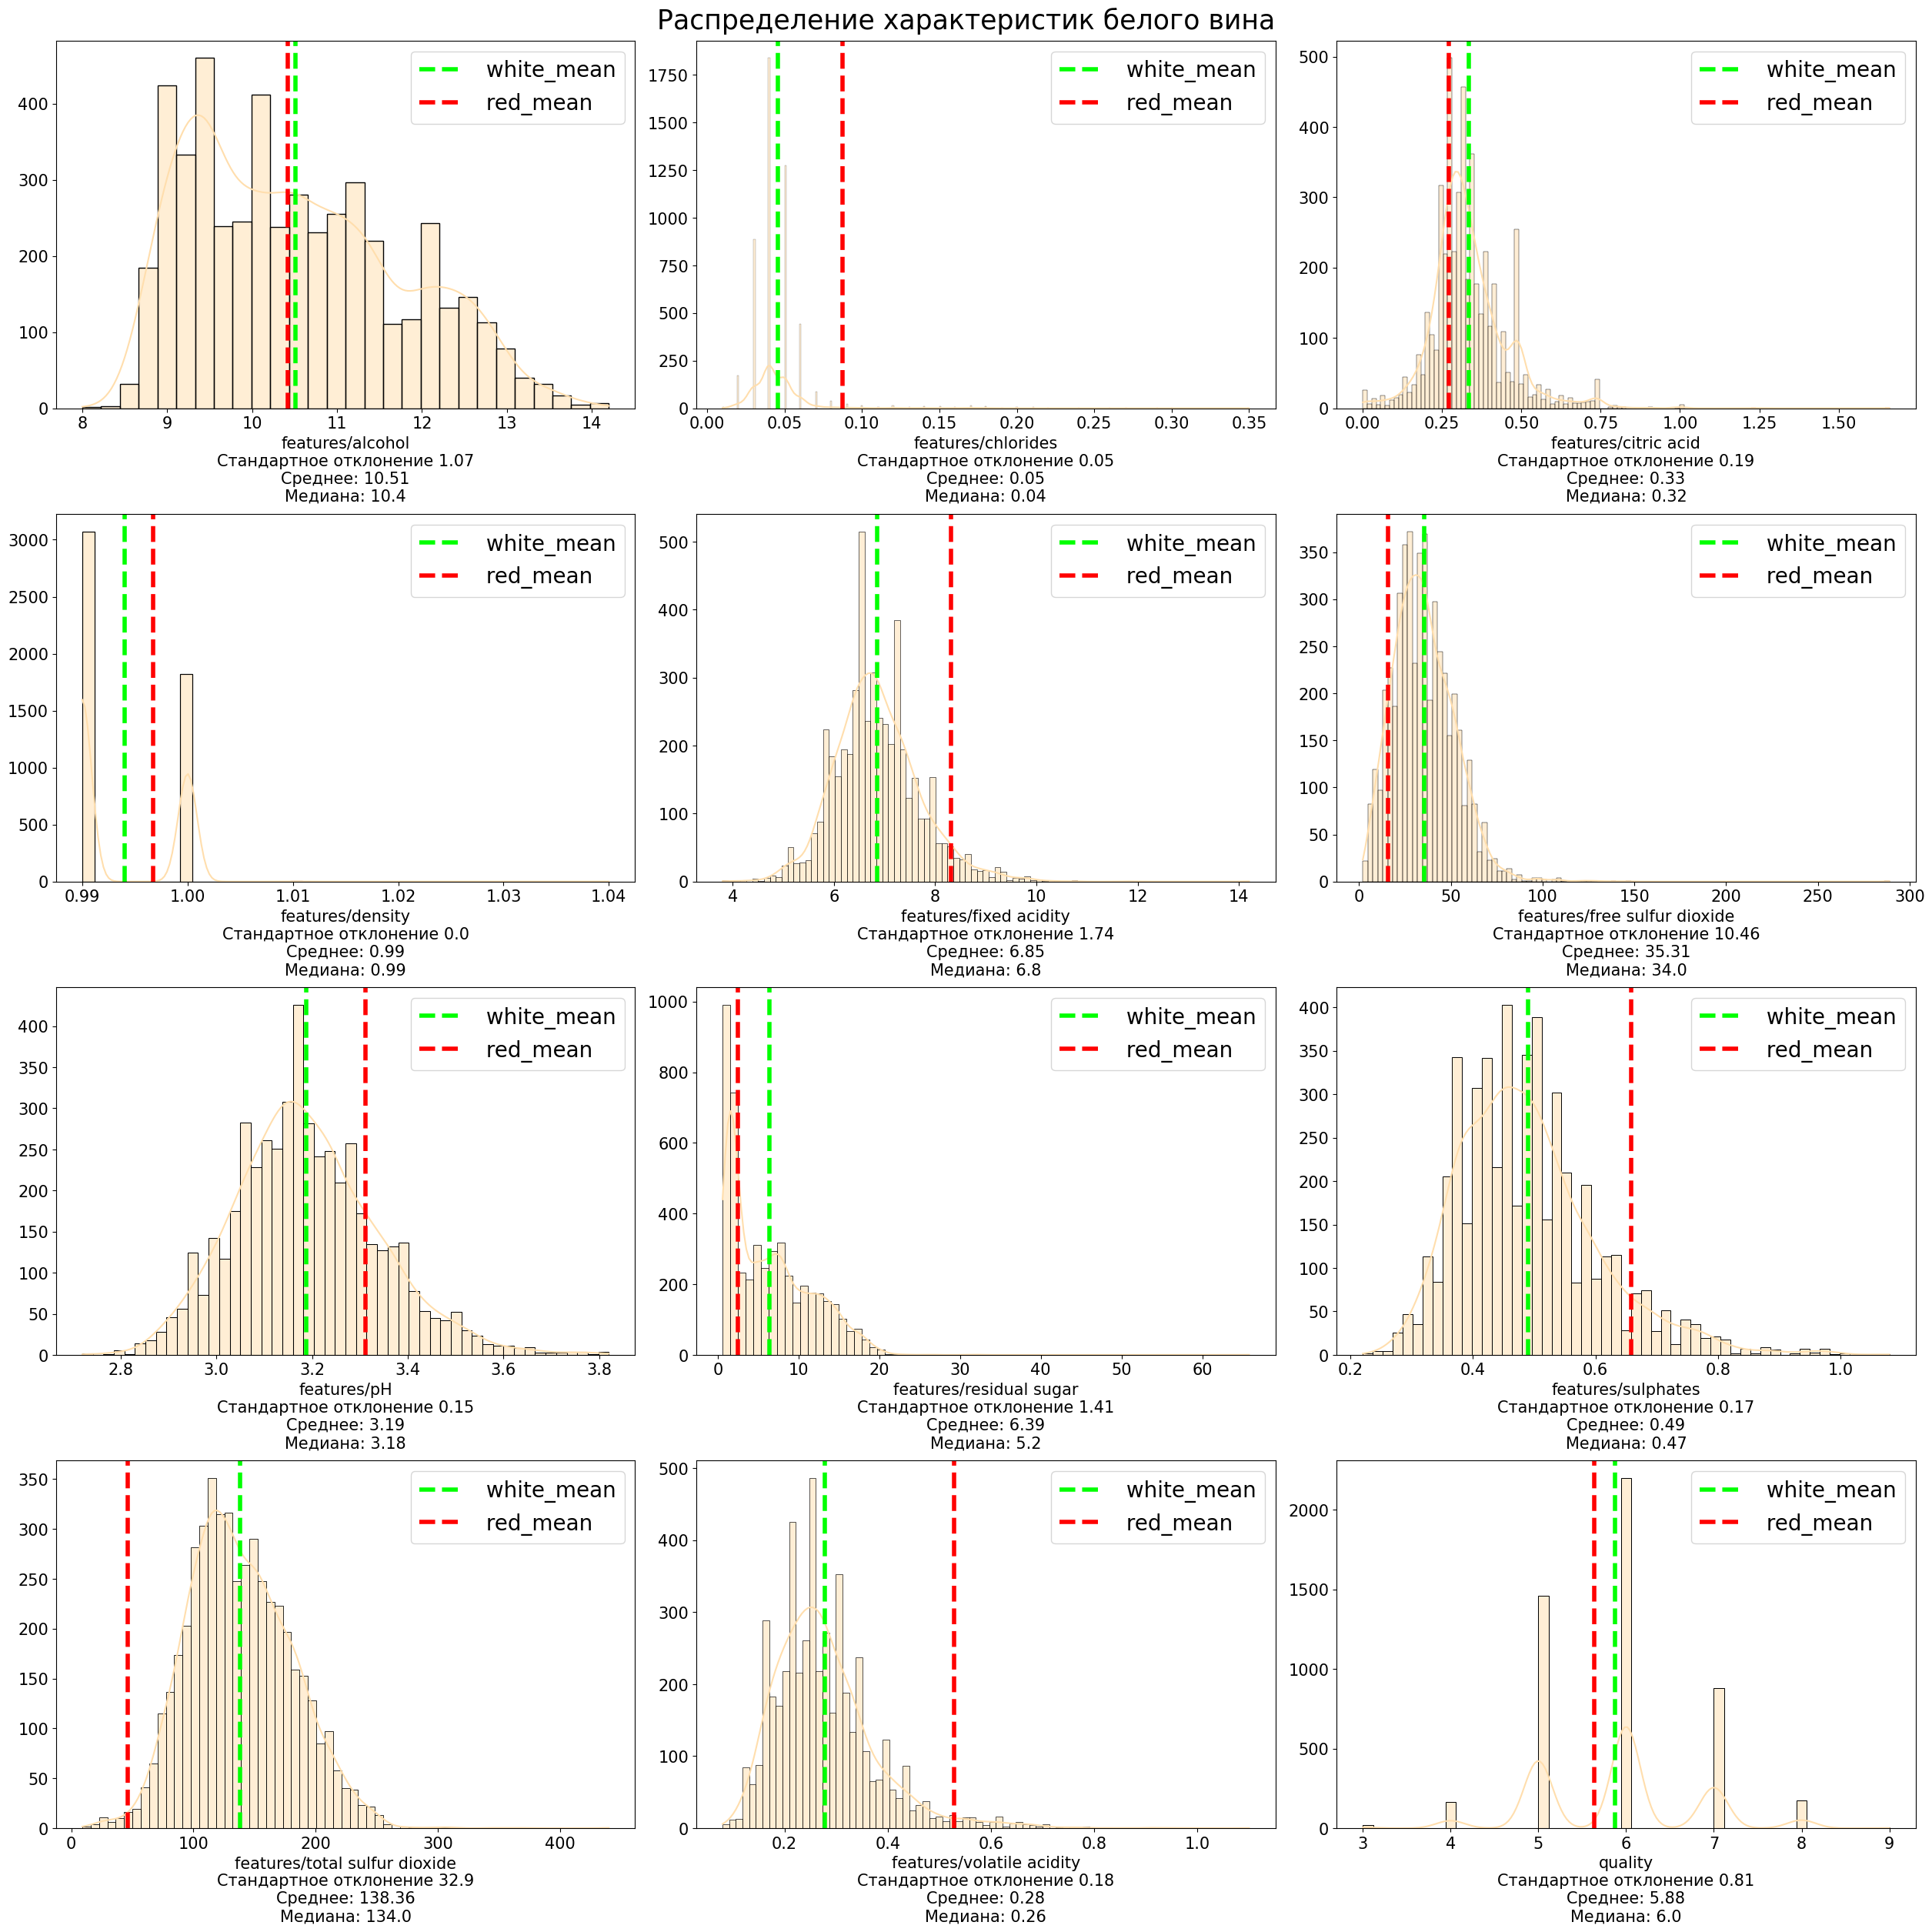

In [14]:
fig, ax = plt.subplots(4,3, constrained_layout=True)
fig.set_size_inches(25,25)
ax_list =[]
for n in range(4):
    for m in range(3):
        ax_list.append(ax[n,m])
        

for i in range(len(list(w.columns[:-1]))):
    col = w.columns[i]
    sns.histplot(round(w[col],2), ax = ax_list[i], kde =True, color= 'navajowhite')
    ax_list[i].set_xlabel(col + '\nСтандартное отклонение ' + str(round(r[col].std(),2)) + '\nСреднее: ' + str(round(w[col].mean(),2)) +
                          '\nМедиана: ' + str(round(w[col].median(),2)), size =15)
    
    ax_list[i].set_ylabel('')
    ax_list[i].tick_params(axis ='y', labelsize =15)
    ax_list[i].tick_params(axis ='x', labelsize = 15)
    ax_list[i].axvline(w[col].mean(), c= 'lime', ls ='--', lw=4, label= ' white_mean')
    ax_list[i].axvline(r[col].mean(), c= 'red', ls ='--', lw=4, label= ' red_mean')
    ax_list[i].legend(fontsize = 20)
    
fig.suptitle('Распределение характеристик белого вина', size =25)
    
plt.show()

Вывод:

# Анализ сравнения вин по количеству алкоголя в  нем

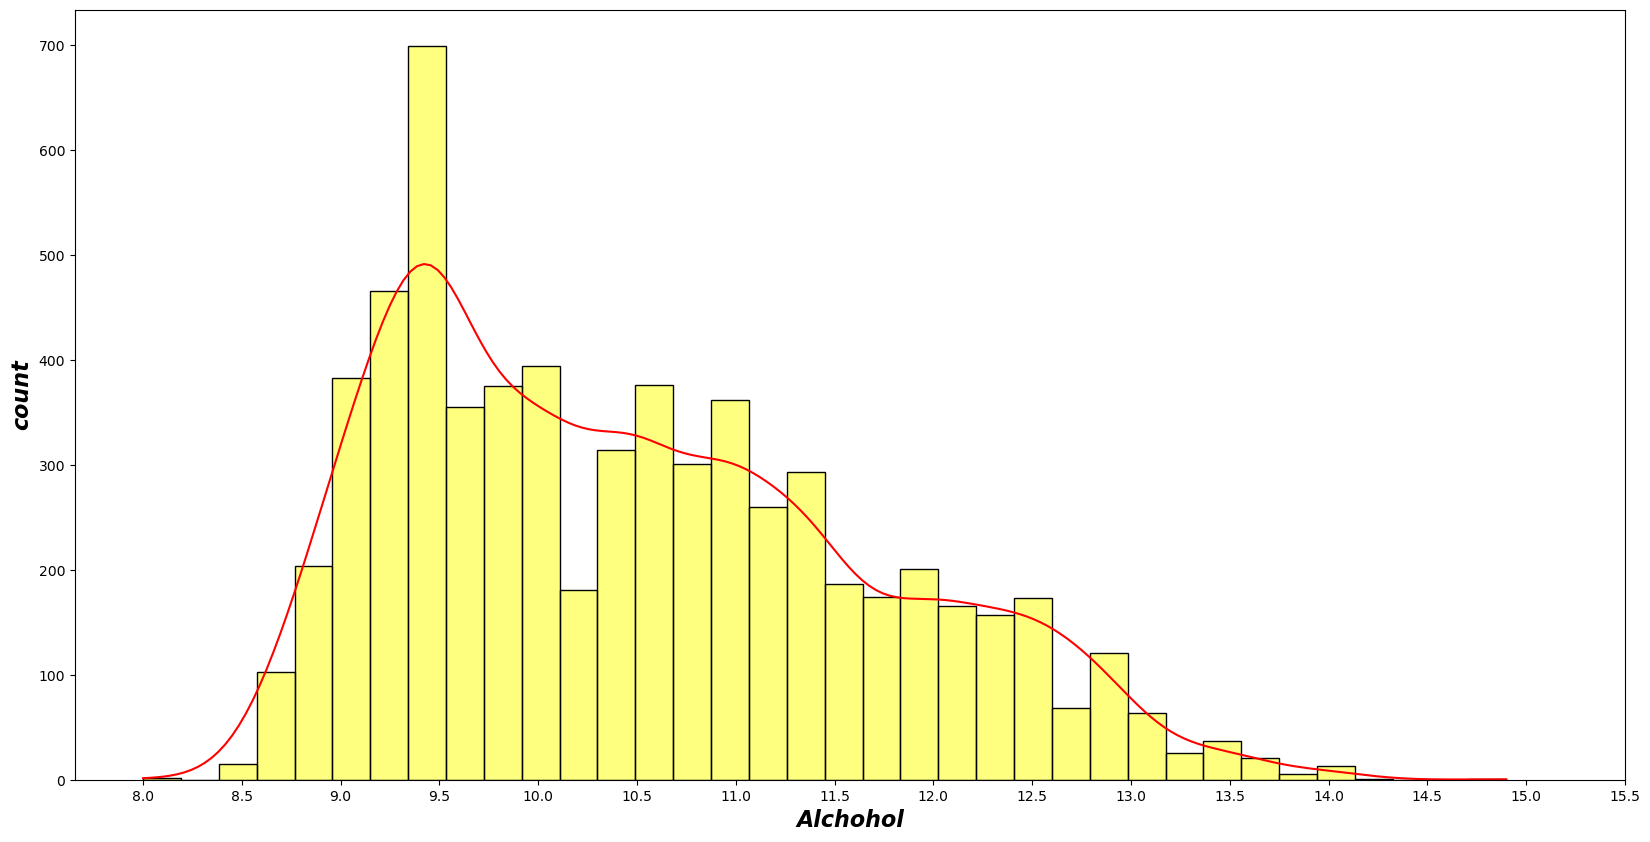

In [15]:
import math
plt.figure(figsize=(20,10))

ax =sns.histplot(df['features/alcohol'] ,  color ='yellow', kde = True)
ax.lines[0].set_color('red')
plt.xlabel('Alchohol', size=16, fontstyle = 'italic', weight = 900)

plt.ylabel('count',size=16, fontstyle = 'italic', weight = 900);
plt.xticks(np.arange(min(df['features/alcohol']), max(df['features/alcohol'])+1, 0.5))
plt.show()

Мода распределения одна и находится в точке с значением 9,5. Посмотрим на среднее качество вин с данным содержанием алкоголя.

In [16]:
a=df[df['features/alcohol'] == 9.5]
a

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality,type
3,9.5,0.078,0.24,0.99830,7.5,10.0,3.45,2.0,0.78,28.0,0.55,6,red
10,9.5,0.085,0.44,0.99708,9.3,9.0,3.28,1.9,0.55,22.0,0.43,5,red
14,9.5,0.213,0.42,0.99940,10.3,6.0,3.19,2.4,0.62,14.0,0.41,6,red
49,9.5,0.091,0.63,1.00040,12.3,6.0,3.16,2.3,0.49,18.0,0.39,5,red
51,9.5,0.067,0.14,0.99690,8.8,10.0,3.19,2.4,0.59,42.0,0.61,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6391,9.5,0.055,0.37,0.99586,6.8,52.0,3.11,8.2,0.52,192.0,0.27,6,white
6398,9.5,0.056,0.27,0.99560,7.1,26.0,2.95,8.6,0.52,111.0,0.21,5,white
6428,9.5,0.050,0.27,0.99422,7.6,23.0,3.08,4.6,0.47,98.0,0.17,6,white
6429,9.5,0.045,0.19,0.99580,7.2,53.0,3.17,7.7,0.38,176.0,0.24,5,white


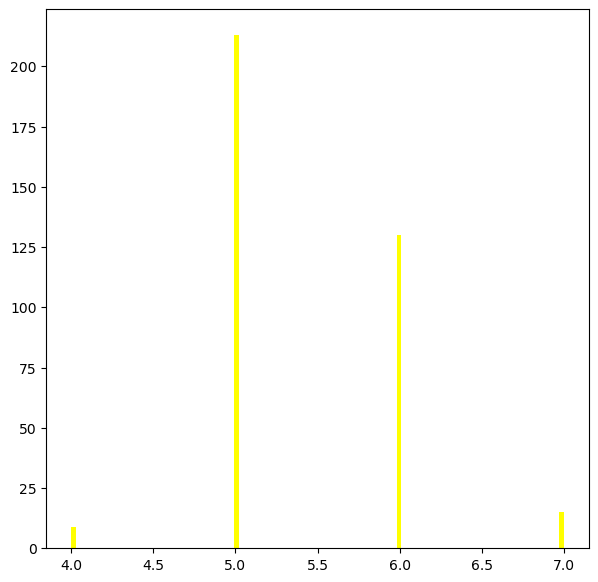

In [17]:
plt.figure(figsize=(7,7))
plt.hist(x=a.quality,bins=100, color='yellow',);


Средняя оценка вин с содержанием алкоголя 9,5% составляет 5-6. Попробуем проследить зависимость между содержанием алкоголя и оценкой потребителей.


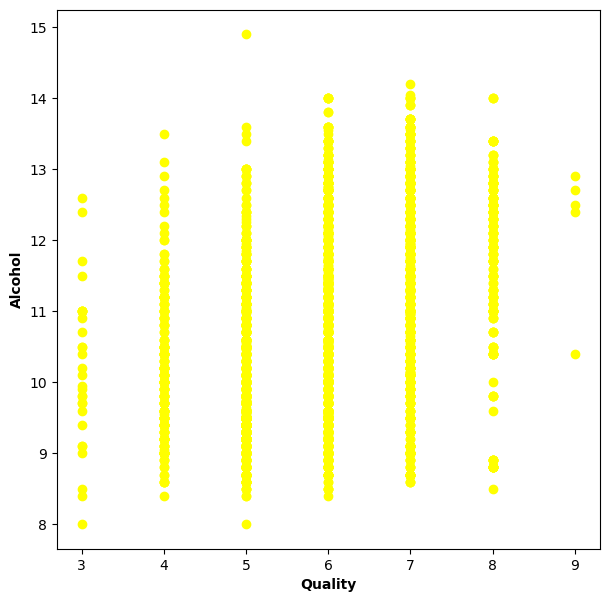

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(x=df['quality'], y=df['features/alcohol'], color ='yellow');
plt.xlabel('Quality', size=10, weight = 900)
plt.ylabel('Alcohol', size=10, weight = 900);

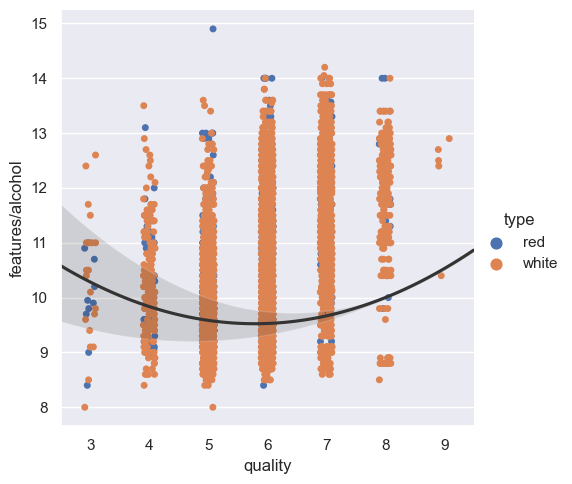

In [19]:
sns.set(rc={'figure.figsize':(20,20)})
sns.catplot(
    data=df, x="quality", y="features/alcohol", hue="type",
    zorder=1
)
sns.regplot(
    data=df, x="quality", y="features/alcohol",
    scatter=False, truncate=False, order=2, color=".2",
);

Вывод: прямой линейной зависимости между процентным содержанием алкоголя и оценками качества нет. 

## Лучшие и худшие вина, представленные в выборке

Вытащим из нашего датасета подборку вин, которые по мнению пользователей являются самыми высоко оцененными и имеют наивысший балл в строке "Качество". 


In [20]:
m=df[df['quality']==df['quality'].max()]
m 

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality,type
2281,12.4,0.021,0.29,0.98965,6.6,24.0,3.41,1.6,0.61,85.0,0.36,9,white
3100,12.9,0.032,0.49,0.99030,7.1,31.0,3.37,2.2,0.42,113.0,0.26,9,white
4270,12.7,0.018,0.34,0.98980,6.9,57.0,3.28,4.2,0.36,119.0,0.36,9,white
5179,12.5,0.031,0.36,0.99055,7.4,27.0,3.28,2.0,0.48,139.0,0.24,9,white
6375,10.4,0.035,0.45,0.99700,9.1,28.0,3.20,10.6,0.46,124.0,0.27,9,white


Наивысшая оценка вина - 9. Всего таких вин 5 штук. Теперь возьмем выборку из вин, которые наименее понравились потребителям и в будущем попробуем сравнить, что влияет на выбор и оценки качества - какие параметры являются ключевыми.

In [21]:
g=df[df['quality']==df['quality'].min()]
g

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality,type
31,10.20,0.082,0.05,0.99808,7.1,3.0,3.40,5.70,0.52,14.0,0.875,3,red
434,10.70,0.097,0.00,0.99660,7.4,5.0,3.63,4.25,0.54,14.0,1.185,3,red
683,11.00,0.084,0.02,0.99892,8.3,6.0,3.48,3.40,0.49,11.0,1.020,3,red
698,9.80,0.267,0.00,0.99471,6.8,16.0,3.32,1.20,0.51,29.0,0.815,3,red
743,9.90,0.145,0.42,0.99832,10.4,34.0,3.38,1.50,0.86,48.0,0.440,3,red
1011,10.90,0.137,0.00,0.99476,7.6,5.0,3.50,2.10,0.40,9.0,1.580,3,red
1052,9.70,0.061,0.05,0.99705,7.3,20.0,3.31,2.10,0.55,49.0,0.980,3,red
1230,8.40,0.200,0.49,0.99940,10.4,5.0,3.16,2.10,0.63,16.0,0.610,3,red
1376,9.00,0.074,0.66,1.00080,11.6,10.0,3.25,2.20,0.57,47.0,0.580,3,red
1542,9.95,0.078,0.02,0.99600,6.7,6.0,3.55,1.80,0.63,12.0,0.760,3,red


In [22]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 31 to 6174
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   features/alcohol               30 non-null     float64
 1   features/chlorides             30 non-null     float64
 2   features/citric acid           30 non-null     float64
 3   features/density               30 non-null     float64
 4   features/fixed acidity         30 non-null     float64
 5   features/free sulfur dioxide   30 non-null     float64
 6   features/pH                    30 non-null     float64
 7   features/residual sugar        30 non-null     float64
 8   features/sulphates             30 non-null     float64
 9   features/total sulfur dioxide  30 non-null     float64
 10  features/volatile acidity      30 non-null     float64
 11  quality                        30 non-null     int64  
 12  type                           30 non-null     ob

Всего вин с наименьшей оценкой (3) оказалось 30 видов. Далее построим 



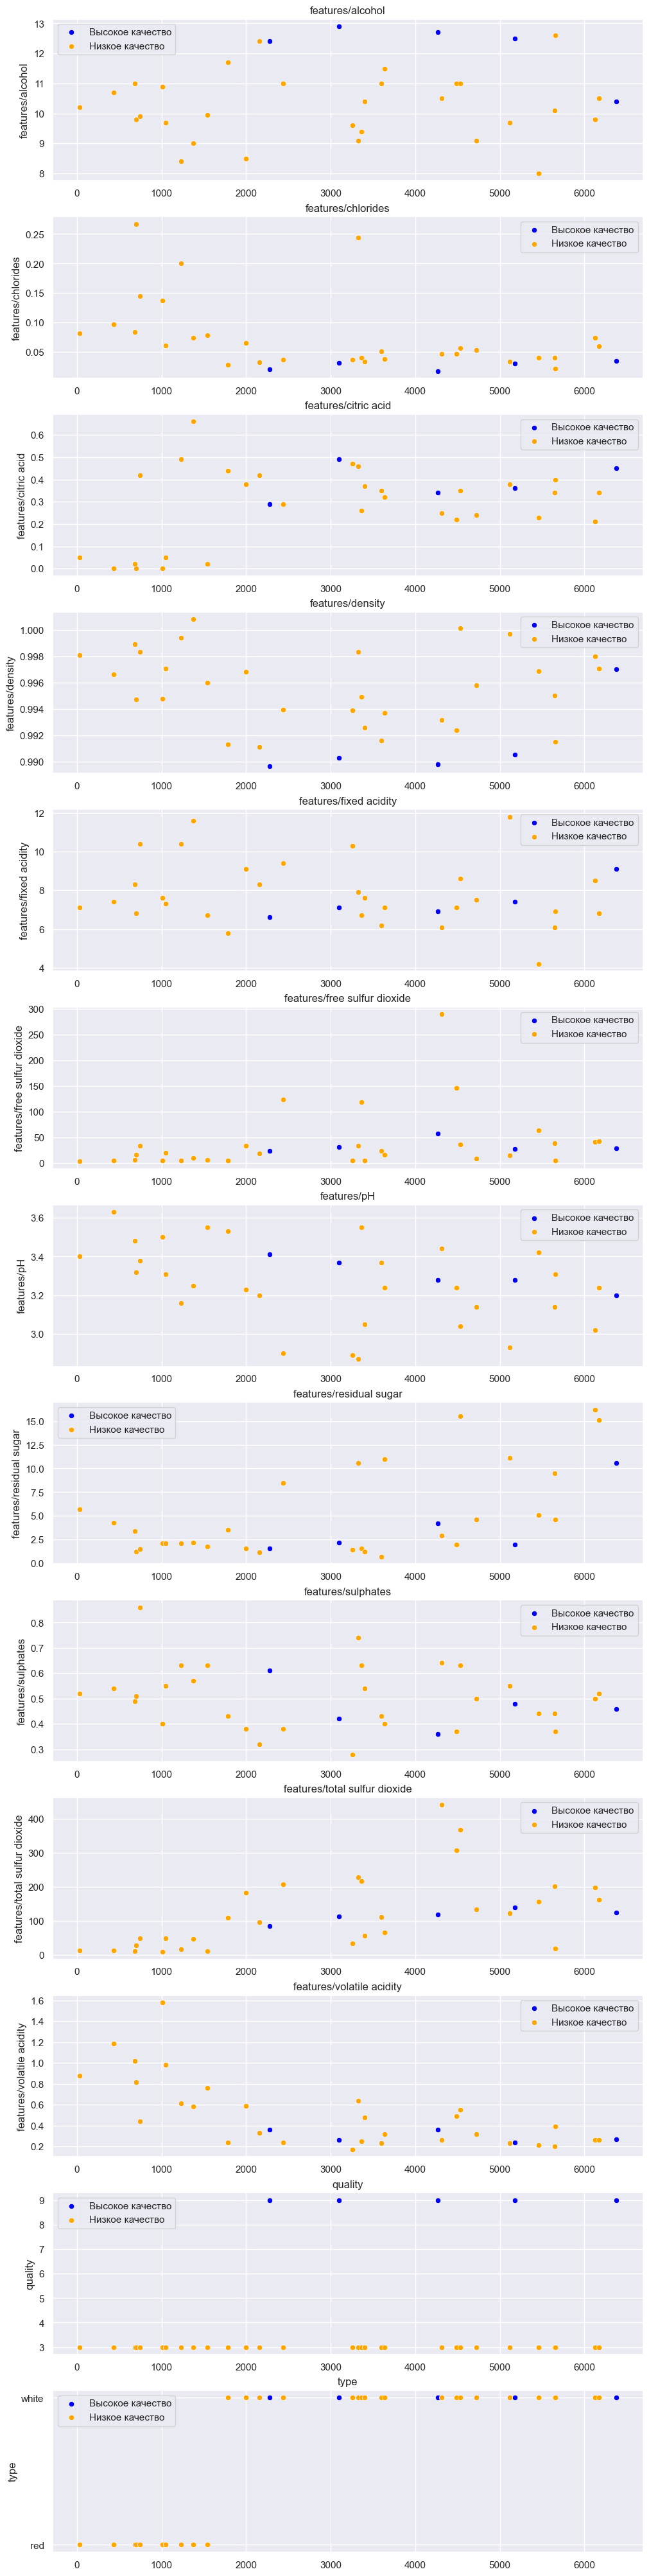

In [23]:
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(20,5), constrained_layout= True)
fig.set_size_inches(10,40)
for i, column in enumerate(df.columns):
    sns.scatterplot(x=m.index, y=m[column], color='blue', ax=axs[i], label='Высокое качество')
    sns.scatterplot(x=g.index, y=g[column], color='orange', ax=axs[i], label='Низкое качество')
    axs[i].set_title(column)
    axs[i].legend()

plt.show()

#### В ходе аналитики полученных точечных графиков получилось сделать следующие микровыводы, которые в перспективе могут нам помочь для обучения нашей модели по определению вина, исходя из входящих в нее параметров оценки: 

1) Вино, которое получило более высокую оценку качества содержит больше алкоголя чем вино с низкими оценками.

2) В вине с высоким качеством ниже содержание ниже содержание хлоридов (достаточно значительно).

3) Плотность высоко качественного вина ниже чем вина с низкими оценками качества.

4) Кислотность качественного вина в среднем ниже чем кислотность некачественного.

5) Сахара и остаточных сульфатов в вине с высокими оценками меньше.

6) Свободная кислостноть высоко качественного вина ниже чем кислотность у некачественного.

7) В нашей выборке все высококачественные вина белые.

#### На основании проделанного анализа предалагем выдвинуть следующие гипотезы:

- Распределение белого и красного вина различаются
- Оценка вина значимо отличается исходя из количества алкоголя в нем
- Чем больше остаточных сульфатов вине чем выше его качество
- Белое вино при тех же свойствах вина обладает более высокой онцкекой